In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime as dt
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset  = pd.read_csv('/content/drive/MyDrive/data.csv',encoding="ISO-8859-1")
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Information about dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#Checking for any null values in the dataset

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Removing null values from the dataset**

In [ ]:
dataset = dataset.dropna()

**Converting negative values in the dataset to their absolute values**

In [ ]:
dataset['Quantity'] = dataset['Quantity'].abs()
dataset['UnitPrice']=dataset['UnitPrice'].abs()
dataset.head(156)

<ipython-input-145-1c55e94c4bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Quantity'] = dataset['Quantity'].abs()
<ipython-input-145-1c55e94c4bb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['UnitPrice']=dataset['UnitPrice'].abs()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,12/1/2010 9:45,16.95,16098.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/1/2010 9:49,4.65,15311.0,United Kingdom


In [ ]:
dataset['TotalSpent'] = dataset['Quantity']*dataset['UnitPrice']
dataset['TotalSpent']

<ipython-input-146-d851bd92202f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TotalSpent'] = dataset['Quantity']*dataset['UnitPrice']


0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalSpent, Length: 406829, dtype: float64

#Grouping customers by customer id based on the Total Spent value

In [ ]:
dataset['CustomerID'] = dataset['CustomerID'].astype(int)
dataset_cust = dataset.groupby('CustomerID',as_index=False)['TotalSpent'].sum()
dataset_cust

<ipython-input-147-423e3ae47672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CustomerID'] = dataset['CustomerID'].astype(int)


,CustomerID,TotalSpent
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,179.50
4370,18283,2094.88


#Grouping customer based on their frequency of the purchases

In [ ]:
dataset_invo = dataset.groupby("CustomerID",as_index=False)["InvoiceNo"].count()
dataset_invo.columns=["CustomerID","Frequency"]
dataset_invo

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,756


#Merging the datasets

In [ ]:
dataset_1 = pd.merge(dataset_cust,dataset_invo,on='CustomerID',how='inner')
dataset_1

,CustomerID,TotalSpent,Frequency
0,12346,154367.20,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17
...,...,...,...
4367,18280,180.60,10
4368,18281,80.82,7
4369,18282,179.50,13
4370,18283,2094.88,756


#Rate of transactions

In [ ]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.date
dataset['InvoiceDate']

<ipython-input-157-aa01603e084b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.date


0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 406829, dtype: object

In [ ]:
max_dates = dataset.groupby('CustomerID')['InvoiceDate'].max()
max_dates

CustomerID
12346.0    48 days
12347.0   371 days
12348.0   298 days
12349.0   355 days
12350.0    63 days
            ...   
18280.0    96 days
18281.0   193 days
18282.0   366 days
18283.0   370 days
18287.0   331 days
Name: InvoiceDate, Length: 4372, dtype: timedelta64[ns]

In [ ]:
dataset['Rate1'] = dataset.groupby('CustomerID')['InvoiceDate'].transform(lambda x: x.max() - x)
dataset['Rate1']

0        71 days
1        71 days
2        71 days
3        71 days
4        71 days
           ...  
541904    0 days
541905    0 days
541906    0 days
541907    0 days
541908    0 days
Name: Rate1, Length: 541909, dtype: timedelta64[ns]

In [ ]:
dataset['Rate'] = max(dataset['InvoiceDate']) - dataset['InvoiceDate']
dataset['Rate']

0        373 days
1        373 days
2        373 days
3        373 days
4        373 days
           ...   
541904     0 days
541905     0 days
541906     0 days
541907     0 days
541908     0 days
Name: Rate, Length: 541909, dtype: timedelta64[ns]

In [ ]:
dataset_rate = dataset.groupby('CustomerID',as_index=False)['Rate'].min()
dataset_rate

,CustomerID,Rate
0,12346.0,325 days
1,12347.0,2 days
2,12348.0,75 days
3,12349.0,18 days
4,12350.0,310 days
...,...,...
4367,18280.0,277 days
4368,18281.0,180 days
4369,18282.0,7 days
4370,18283.0,3 days


In [ ]:
dataset_rate = dataset.groupby('CustomerID',as_index=False)['Rate1'].mean()
dataset_rate

,CustomerID,Rate1
0,12346.0,0 days 00:00:00
1,12347.0,187 days 08:18:27.692307692
2,12348.0,230 days 03:05:48.387096776
3,12349.0,0 days 00:00:00
4,12350.0,0 days 00:00:00
...,...,...
4367,18280.0,0 days 00:00:00
4368,18281.0,0 days 00:00:00
4369,18282.0,72 days 22:09:13.846153846
4370,18283.0,131 days 08:59:02.857142858


#Merging of all three datasets [dataset_cust,dataset_invo],dataset_rate

In [ ]:
final_dataset = pd.merge(dataset_1,dataset_rate,on='CustomerID',how="inner")
final_dataset

,CustomerID,TotalSpent,Frequency,Rate
0,12346,154367.20,2,325 days
1,12347,4310.00,182,2 days
2,12348,1797.24,31,75 days
3,12349,1757.55,73,18 days
4,12350,334.40,17,310 days
...,...,...,...,...
4367,18280,180.60,10,277 days
4368,18281,80.82,7,180 days
4369,18282,179.50,13,7 days
4370,18283,2094.88,756,3 days


#Outliers Detection

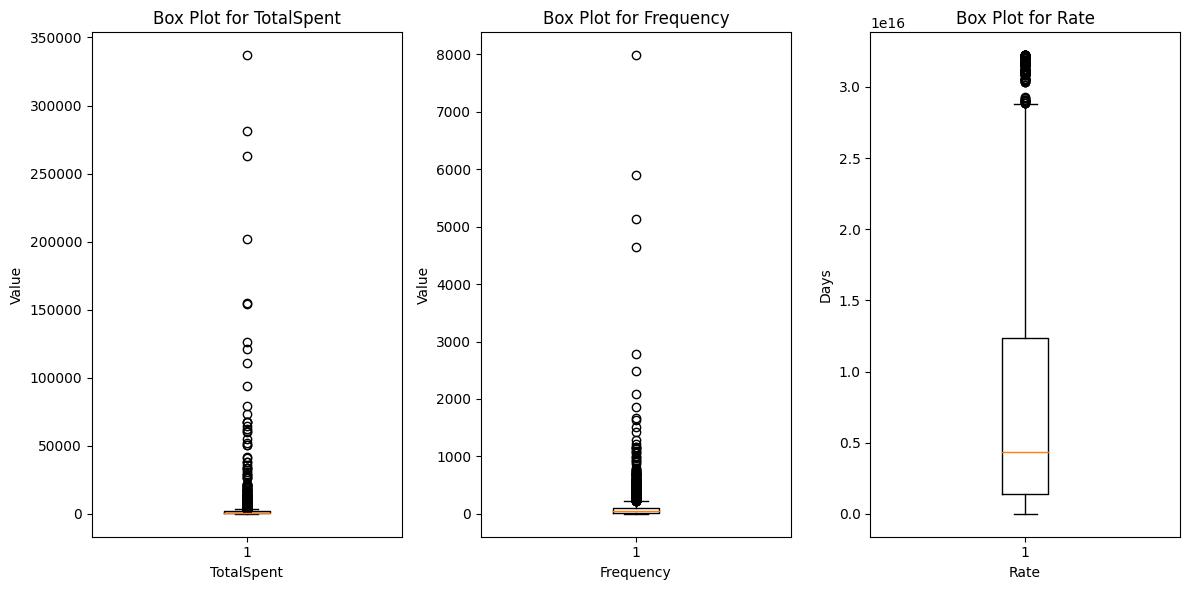

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(final_dataset['TotalSpent'])
plt.xlabel('TotalSpent')
plt.ylabel('Value')
plt.title('Box Plot for TotalSpent')

plt.subplot(1, 3, 2)
plt.boxplot(final_dataset['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Box Plot for Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(final_dataset['Rate'])
plt.xlabel('Rate')
plt.ylabel('Days')
plt.title('Box Plot for Rate')

plt.tight_layout()
plt.show()

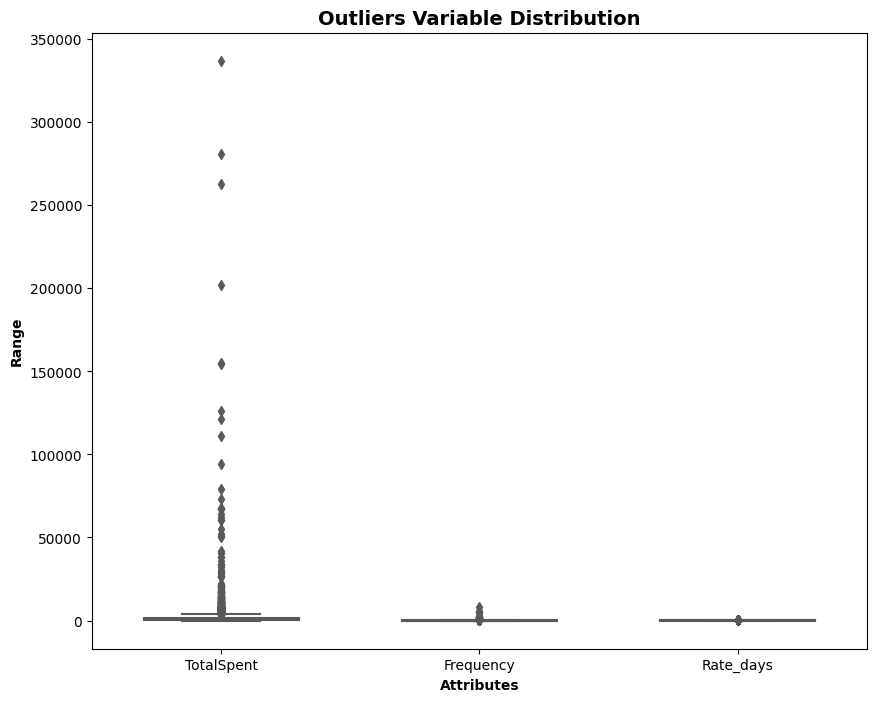

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final_dataset has columns 'TotalSpent', 'Frequency', and 'Rate'
# If 'Rate' is in timedelta format, convert it to days for plotting
final_dataset['Rate_days'] = final_dataset['Rate'].dt.days

# List of attributes to plot
attributes = ['TotalSpent', 'Frequency', 'Rate_days']

# Create box plots for 'TotalSpent', 'Frequency', and 'Rate_days'
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data=final_dataset[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.6)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.xticks(range(len(attributes)), attributes)  # Set attribute names as x-ticks
plt.show()


#Removing Outliers

In [ ]:
#Removing (statistical) outliers for Amount

Q1=final_dataset.TotalSpent.quantile (0.05);

Q3=final_dataset.TotalSpent.quantile (0.95);

IQR=Q3-Q1;

final_dataset = final_dataset[(final_dataset['TotalSpent'] >= Q1 - 1.5 * IQR) & (final_dataset['TotalSpent'] <= Q3 + 1.5 * IQR)]

#Removing (statistical) outliers for Rate

Q1 = final_dataset. Rate_days.quantile (0.05);

Q3 = final_dataset.Rate_days.quantile (0.95);

IQR = Q3-Q1

final_dataset = final_dataset[(final_dataset['Rate_days'] >= Q1 - 1.5 * IQR) & (final_dataset['Rate_days'] <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for Frequency

Q1= final_dataset.Frequency.quantile (0.05)

Q3 = final_dataset.Frequency.quantile (0.95)

IQR = Q3-Q1

final_dataset=final_dataset[(final_dataset['Frequency'] >= Q1 - 1.5 * IQR) & (final_dataset['Frequency'] <= Q3 + 1.5 * IQR)]
final_dataset.drop('Rate',axis=1)

,CustomerID,TotalSpent,Frequency,Rate_days
2,12348,1797.24,31,75
3,12349,1757.55,73,18
4,12350,334.40,17,310
6,12353,89.00,4,204
7,12354,1079.40,58,232
...,...,...,...,...
4366,18278,173.90,9,73
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,179.50,13,7


In [ ]:
#Removing (statistical) outliers for Amount

Q1=final_dataset.TotalSpent.quantile (0.25);

Q3=final_dataset.TotalSpent.quantile (0.75);

IQR=Q3-Q1;

final_dataset = final_dataset[(final_dataset['TotalSpent'] >= Q1 - 1.5 * IQR) & (final_dataset['TotalSpent'] <= Q3 + 1.5 * IQR)]

#Removing (statistical) outliers for Rate

Q1 = final_dataset. Rate_days.quantile (0.25);

Q3 = final_dataset.Rate_days.quantile (0.75);

IQR = Q3-Q1

final_dataset = final_dataset[(final_dataset['Rate_days'] >= Q1 - 1.5 * IQR) & (final_dataset['Rate_days'] <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for Frequency

Q1= final_dataset.Frequency.quantile (0.25)

Q3 = final_dataset.Frequency.quantile (0.75)

IQR = Q3-Q1

final_dataset_1=final_dataset[(final_dataset['Frequency'] >= Q1 - 1.5 * IQR) & (final_dataset['Frequency'] <= Q3 + 1.5 * IQR)]
final_dataset_1.drop('Rate',axis=1)

,CustomerID,TotalSpent,Frequency,Rate_days
2,12348,1797.24,31,75
3,12349,1757.55,73,18
4,12350,334.40,17,310
6,12353,89.00,4,204
7,12354,1079.40,58,232
...,...,...,...,...
4366,18278,173.90,9,73
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,179.50,13,7


#Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalSpent', 'Frequency', 'Rate_days']
scaler = StandardScaler()
scaler.fit(final_dataset[numerical_columns])
final_dataset[numerical_columns] = scaler.transform(final_dataset[numerical_columns])
final_dataset.drop('Rate', axis=1, inplace=True)
final_dataset

,CustomerID,TotalSpent,Frequency,Rate_days,Cluster
2,12348,1.605886,-0.380723,-0.230875,2
3,12349,1.544117,0.334286,-0.816442,2
4,12350,-0.670707,-0.619059,2.183308,1
6,12353,-1.052619,-0.840371,1.094358,1
7,12354,0.488724,0.078926,1.382005,1
...,...,...,...,...,...
4366,18278,-0.920490,-0.755251,-0.251421,0
4367,18280,-0.910063,-0.738227,1.844295,1
4368,18281,-1.065349,-0.789299,0.847803,1
4369,18282,-0.911775,-0.687155,-0.929447,0


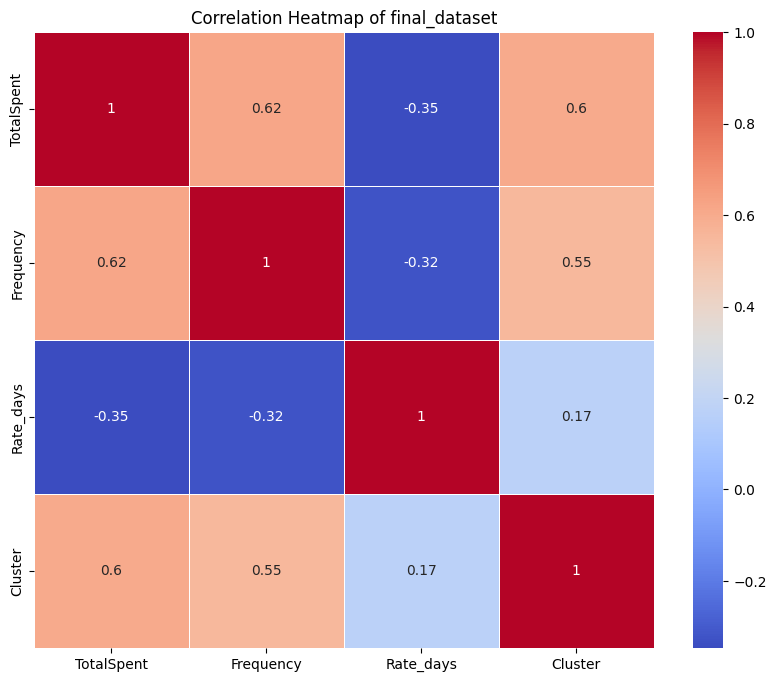

In [ ]:
plt.figure(figsize=(10, 8))
f_1 = final_dataset.drop('CustomerID',axis=1)
sns.heatmap(f_1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of final_dataset')
plt.show()


#Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

numerical_columns = ['TotalSpent', 'Frequency', 'Rate_days']


num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=42)


kmeans.fit(final_dataset[numerical_columns])


final_dataset['Cluster'] = kmeans.labels_
final_dataset




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,TotalSpent,Frequency,Rate,Rate_days,Cluster
2,12348,1.605886,-0.380723,75 days,-0.230875,2
3,12349,1.544117,0.334286,18 days,-0.816442,2
4,12350,-0.670707,-0.619059,310 days,2.183308,1
6,12353,-1.052619,-0.840371,204 days,1.094358,1
7,12354,0.488724,0.078926,232 days,1.382005,1
...,...,...,...,...,...,...
4366,18278,-0.920490,-0.755251,73 days,-0.251421,0
4367,18280,-0.910063,-0.738227,277 days,1.844295,1
4368,18281,-1.065349,-0.789299,180 days,0.847803,1
4369,18282,-0.911775,-0.687155,7 days,-0.929447,0


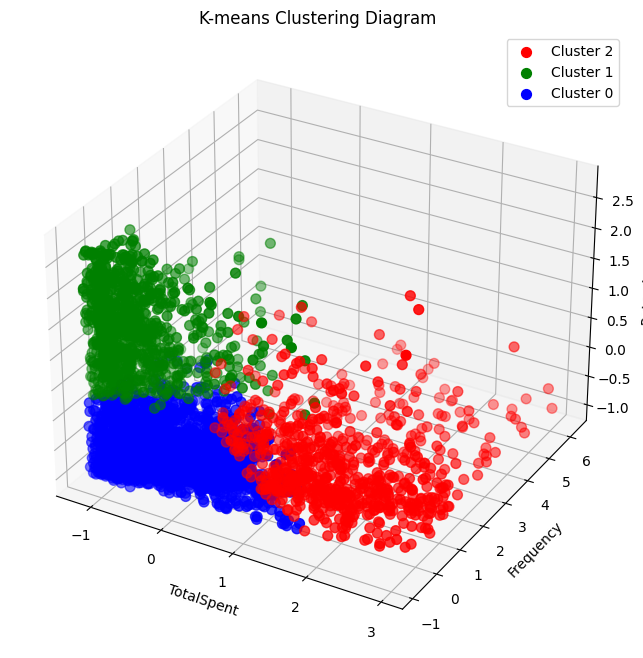

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if you have more clusters
for cluster_label in final_dataset['Cluster'].unique():
    cluster_data = final_dataset[final_dataset['Cluster'] == cluster_label]
    ax.scatter(cluster_data['TotalSpent'], cluster_data['Frequency'], cluster_data['Rate_days'],
              c=cluster_colors[cluster_label], label=f'Cluster {cluster_label}', s=50)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Rate_days')
plt.title('K-means Clustering Diagram')
ax.legend()
plt.show()


#To get correct number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

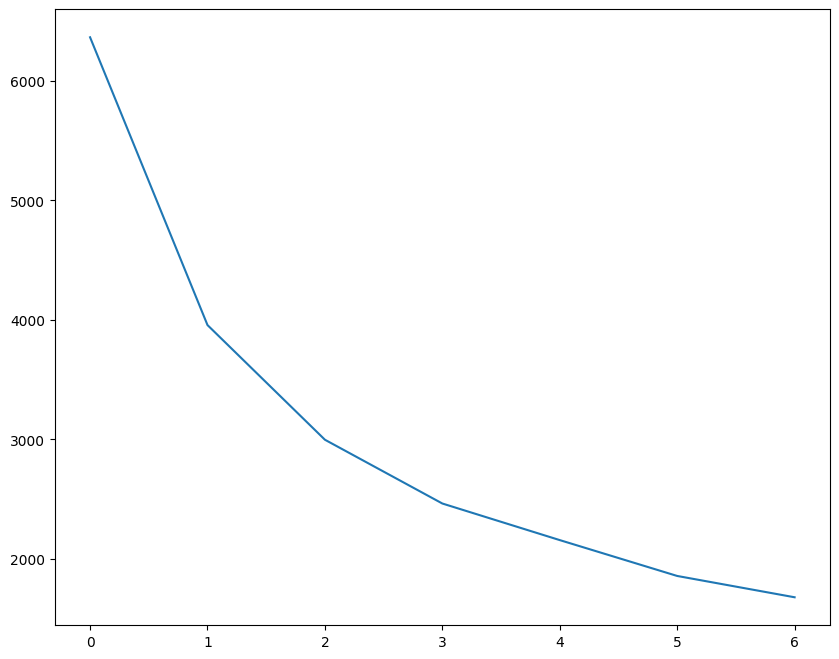

In [ ]:
s=[]
range={2,3,4,5,6,7,8}
for num in range:
  res = KMeans(n_clusters=num,max_iter=50)
  res.fit(final_dataset[numerical_columns])
  s.append(res.inertia_)
plt.plot(s)

We can select the no of clusters using the elbow curve that is 3

#**Final Output**

In [ ]:
final_dataset

,CustomerID,TotalSpent,Frequency,Rate,Rate_days,Cluster
2,12348,1.605886,-0.380723,75 days,-0.230875,2
3,12349,1.544117,0.334286,18 days,-0.816442,2
4,12350,-0.670707,-0.619059,310 days,2.183308,1
6,12353,-1.052619,-0.840371,204 days,1.094358,1
7,12354,0.488724,0.078926,232 days,1.382005,1
...,...,...,...,...,...,...
4366,18278,-0.920490,-0.755251,73 days,-0.251421,0
4367,18280,-0.910063,-0.738227,277 days,1.844295,1
4368,18281,-1.065349,-0.789299,180 days,0.847803,1
4369,18282,-0.911775,-0.687155,7 days,-0.929447,0
